In [4]:
options(repr.plot.width =15, repr.plot.height =10)

In [9]:
# Load required libraries
library(ggplot2)
library(ggbump)
library(ggthemes)
library(dplyr)
library(tidyr)
library(scales)

# Race-by-race points earned (not cumulative) for Verstappen vs Norris 2024
# Based on race wins, podiums, and estimated finishing positions
race_points_data <- data.frame(
  race = rep(1:24, 2),
  grand_prix = rep(c("Bahrain", "Saudi Arabia", "Australia", "Japan", "China", 
                     "Miami", "Emilia Romagna", "Monaco", "Canada", "Spain", 
                     "Austria", "British", "Hungarian", "Belgian", "Dutch", 
                     "Italian", "Azerbaijan", "Singapore", "United States", 
                     "Mexico", "Brazil", "Las Vegas", "Qatar", "Abu Dhabi"), 2),
  driver = c(rep("Max Verstappen", 24), rep("Lando Norris", 24)),
  driver_code = c(rep("VER", 24), rep("NOR", 24)),
  # Points earned in each individual race (not cumulative)
  race_points = c(
    # Verstappen race-by-race points (W=26, 2nd=18, 3rd=15, etc.)
    26, 25, 18, 25, 25, 18, 25, 8, 25, 25, 18, 18, 10, 12, 25, 8, 10, 18, 18, 13, 31, 10, 26, 8,
    # Norris race-by-race points 
    8, 8, 18, 8, 8, 26, 8, 8, 8, 8, 8, 18, 18, 8, 25, 18, 10, 26, 18, 18, 15, 18, 34, 25
  ),
  # Finishing positions (estimated)
  position = c(
    # Verstappen positions (1=win, 2=2nd, etc.)
    1, 1, 2, 1, 1, 2, 1, 6, 1, 1, 2, 2, 5, 4, 1, 6, 5, 2, 2, 3, 1, 5, 1, 6,
    # Norris positions
    6, 6, 2, 6, 6, 1, 6, 6, 6, 6, 6, 2, 2, 6, 1, 2, 4, 1, 2, 2, 3, 2, 1, 1
  )
)

# Define team colors
team_colors <- c("Max Verstappen" = "#4781D7", "Lando Norris" = "#F47600")

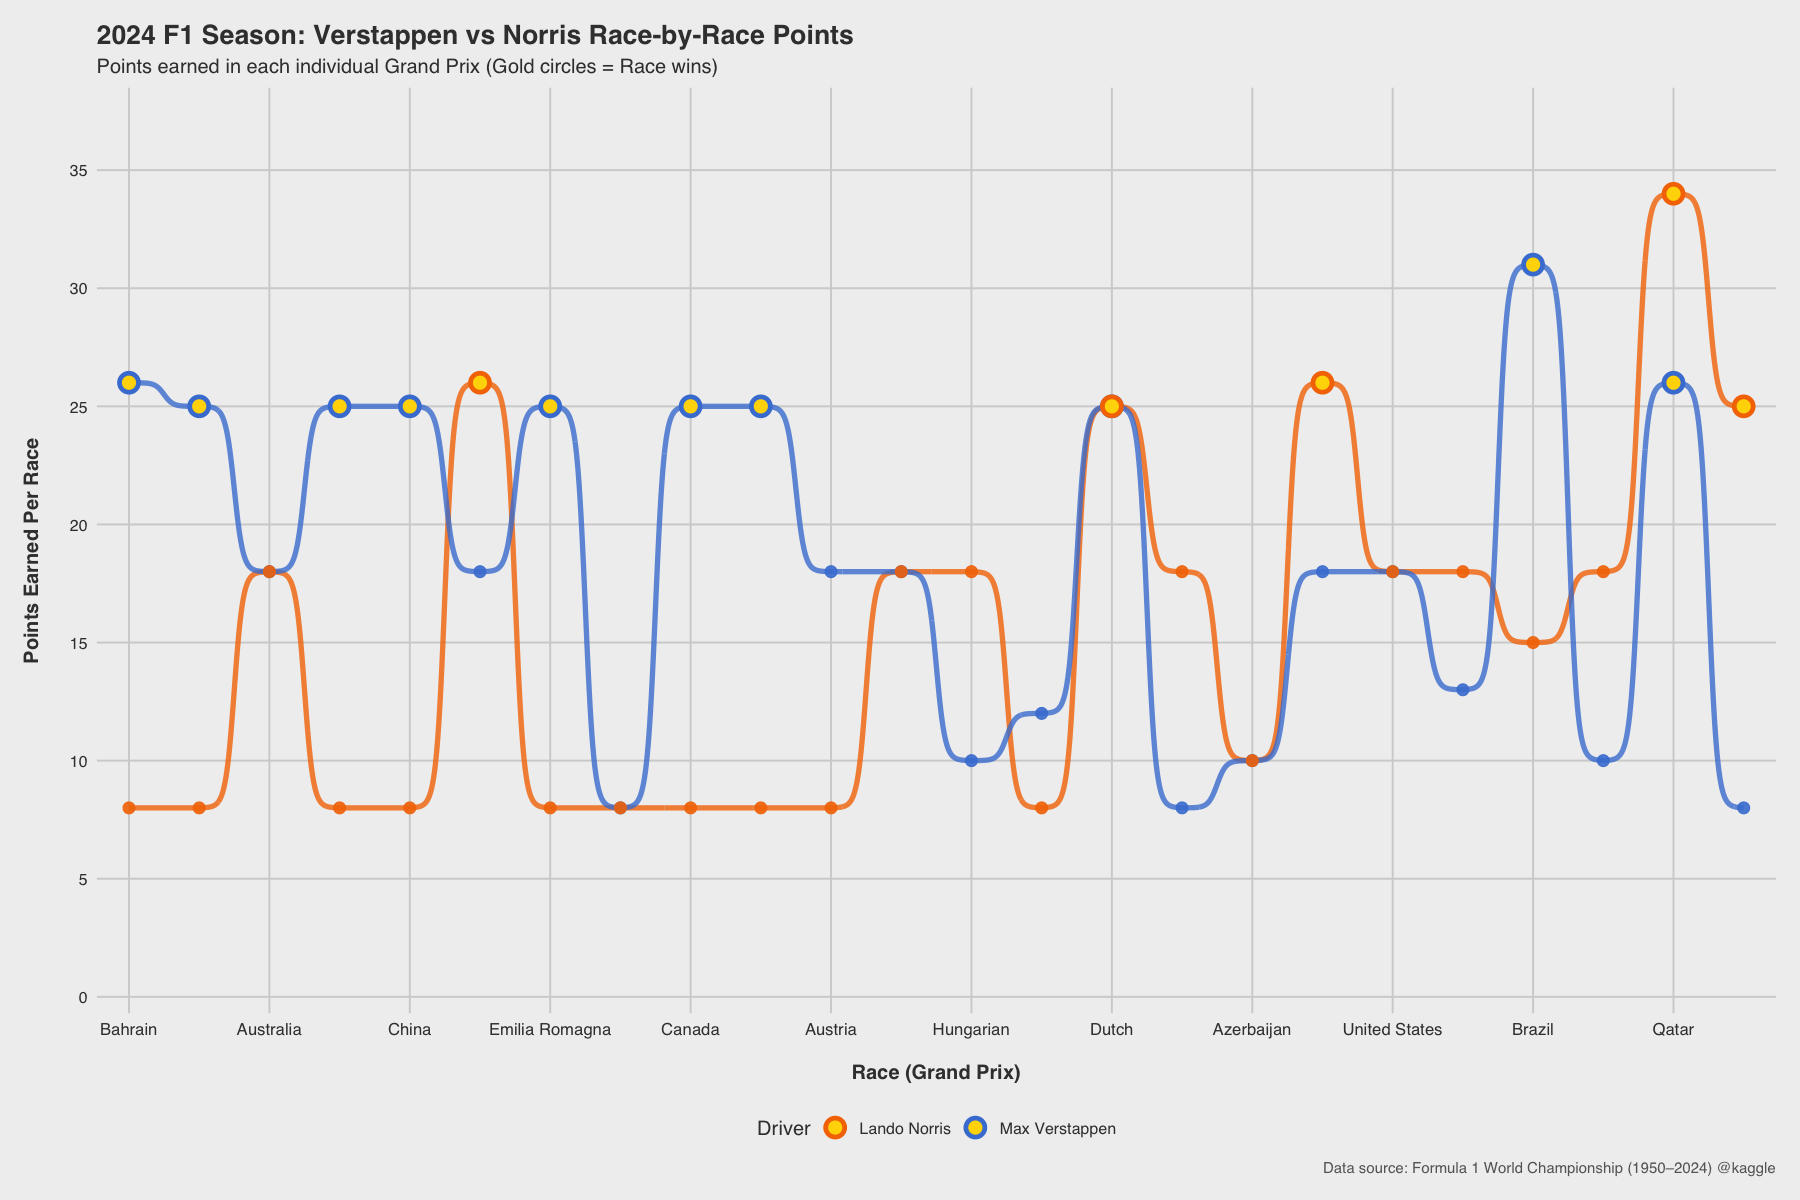

In [15]:
# Create race-by-race points comparison chart
points_comparison <- race_points_data %>%
  ggplot(aes(x = race, y = race_points, color = driver)) +
  geom_bump(size = 1.5, alpha = 0.8) +
  geom_point(size = 3, alpha = 0.9) +
  # Highlight race wins (26 points)
  geom_point(data = race_points_data %>% filter(race_points >= 25), 
             size = 4, shape = 21, fill = "gold", stroke = 2) +
  # Add driver labels at key races
  # geom_text(data = race_points_data %>% filter(race %in% c(5, 15, 24)), 
  #           aes(label = driver_code), 
  #           vjust = -1.2, fontface = "bold", size = 3.5) +
  scale_color_manual(values = team_colors, name = "Driver") +
  scale_x_continuous(
    breaks = seq(1, 24, 2), 
    labels = race_points_data$grand_prix[seq(1, 24, 2)],
    expand = expansion(mult = c(0.02, 0.02))
  ) +
  scale_y_continuous(
    breaks = seq(0, 35, 5),
    limits = c(0, 35),
    expand = expansion(mult = c(0.02, 0.1))
  ) +
  labs(
    title = "2024 F1 Season: Verstappen vs Norris Race-by-Race Points",
    subtitle = "Points earned in each individual Grand Prix (Gold circles = Race wins)",
    x = "Race (Grand Prix)",
    y = "Points Earned Per Race",
    caption = "Data source: Formula 1 World Championship (1950–2024) @kaggle"
  ) +
  theme_fivethirtyeight() +
  theme(
    axis.title.x = element_text(margin = margin(t = 16), size = 12, face = "bold"),
    axis.title.y = element_text(margin = margin(r = 16), size = 12, face = "bold"),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12),
    plot.caption = element_text(size = 9, color = "gray40")
  ) 

print(points_comparison)

# Create points gap analysis for each race
# gap_data <- race_points_data %>%
#   select(race, driver, race_points, grand_prix) %>%
#   pivot_wider(names_from = driver, values_from = race_points) %>%
#   mutate(
#     points_gap = `Max Verstappen` - `Lando Norris`,
#     winner = case_when(
#       points_gap > 0 ~ "Verstappen",
#       points_gap < 0 ~ "Norris", 
#       TRUE ~ "Tie"
#     ),
#     abs_gap = abs(points_gap),
#     verstappen_wins = `Max Verstappen` >= 25,
#     norris_wins = `Lando Norris` >= 25
#   )

# gap_chart <- gap_data %>%
#   ggplot(aes(x = race, y = points_gap)) +
#   geom_hline(yintercept = 0, color = "black", linetype = "dashed", size = 1) +
#   # Color bars based on who scored more points
#   geom_col(aes(fill = winner), alpha = 0.7, width = 0.7) +
#   # Add points on top of bars
#   geom_text(aes(label = ifelse(abs(points_gap) > 1, 
#                               paste0(ifelse(points_gap > 0, "+", ""), points_gap), "")), 
#             vjust = ifelse(gap_data$points_gap > 0, -0.3, 1.3), 
#             fontface = "bold", size = 3) +
#   # Highlight race wins with different styling
#   geom_point(data = gap_data %>% filter(verstappen_wins | norris_wins), 
#              aes(y = points_gap), size = 4, shape = 21, fill = "gold", stroke = 2) +
#   scale_fill_manual(values = c("Verstappen" = team_colors["Max Verstappen"], 
#                               "Norris" = team_colors["Lando Norris"],
#                               "Tie" = "gray50"), 
#                    name = "Race Points Winner") +
#   scale_x_continuous(
#     breaks = seq(1, 24, 2), 
#     labels = gap_data$grand_prix[seq(1, 24, 2)],
#     expand = expansion(mult = c(0.02, 0.02))
#   ) +
#   scale_y_continuous(
#     breaks = seq(-20, 25, 5),
#     labels = function(x) ifelse(x > 0, paste0("+", x), as.character(x)),
#     limits = c(-22, 27)
#   ) +
#   labs(
#     title = "2024 F1 Season: Race-by-Race Points Gap (Verstappen vs Norris)",
#     subtitle = "Points difference per race (+ = Verstappen scored more, - = Norris scored more)",
#     x = "Race (Grand Prix)",
#     y = "Points Gap Per Race",
#     caption = "Data: Formula 1 2024 Season | Gold circles = Race winner earned 25+ points"
#   ) +
#   theme_minimal() +
#   theme(
#     plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
#     plot.subtitle = element_text(size = 14, hjust = 0.5, color = "gray60"),
#     plot.caption = element_text(size = 10, hjust = 0.5, color = "gray50"),
#     axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
#     axis.text.y = element_text(size = 11),
#     axis.title = element_text(size = 12, face = "bold"),
#     legend.position = "bottom",
#     legend.title = element_text(size = 12, face = "bold"),
#     legend.text = element_text(size = 11),
#     panel.grid.minor = element_blank(),
#     panel.grid.major.x = element_line(color = "gray90", size = 0.5),
#     panel.grid.major.y = element_line(color = "gray90", size = 0.5),
#     plot.background = element_rect(fill = "white", color = NA),
#     panel.background = element_rect(fill = "white", color = NA)
#   )

# print(gap_chart)

# # Race wins comparison
# wins_data <- race_points_data %>%
#   mutate(is_win = race_points >= 25) %>%
#   group_by(driver) %>%
#   summarise(
#     total_wins = sum(is_win),
#     total_points = sum(race_points),
#     avg_points_per_race = round(mean(race_points), 1),
#     .groups = 'drop'
#   )

# wins_comparison_chart <- race_points_data %>%
#   mutate(
#     result_type = case_when(
#       race_points >= 25 ~ "Win (25+ pts)",
#       race_points >= 15 ~ "Podium (15-24 pts)", 
#       race_points >= 8 ~ "Points (8-14 pts)",
#       TRUE ~ "No Points (0-7 pts)"
#     )
#   ) %>%
#   count(driver, result_type) %>%
#   ggplot(aes(x = driver, y = n, fill = result_type)) +
#   geom_col(position = "stack", alpha = 0.8, width = 0.6) +
#   geom_text(aes(label = n), position = position_stack(vjust = 0.5), 
#             fontface = "bold", color = "white", size = 4) +
#   scale_fill_manual(values = c("Win (25+ pts)" = "#FFD700", 
#                               "Podium (15-24 pts)" = "#C0C0C0",
#                               "Points (8-14 pts)" = "#CD7F32",
#                               "No Points (0-7 pts)" = "#8B0000"),
#                    name = "Race Results") +
#   labs(
#     title = "2024 F1 Season: Verstappen vs Norris Race Results Breakdown",
#     subtitle = "Distribution of race finishes across 24 Grand Prix",
#     x = "Driver",
#     y = "Number of Races",
#     caption = "Data: Formula 1 2024 Season"
#   ) +
#   theme_minimal() +
#   theme(
#     plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
#     plot.subtitle = element_text(size = 12, hjust = 0.5, color = "gray60"),
#     plot.caption = element_text(size = 10, hjust = 0.5, color = "gray50"),
#     axis.text = element_text(size = 12),
#     axis.title = element_text(size = 12, face = "bold"),
#     legend.position = "right",
#     legend.title = element_text(size = 11, face = "bold"),
#     legend.text = element_text(size = 10),
#     panel.grid.minor = element_blank(),
#     plot.background = element_rect(fill = "white", color = NA),
#     panel.background = element_rect(fill = "white", color = NA)
#   )

# print(wins_comparison_chart)

# # Summary statistics
# cat("\n=== VERSTAPPEN vs NORRIS 2024 RACE-BY-RACE ANALYSIS ===\n")
# cat("\nRace Wins:\n")
# cat("Max Verstappen:", sum(race_points_data[race_points_data$driver == "Max Verstappen", "race_points"] >= 25), "wins\n")
# cat("Lando Norris:", sum(race_points_data[race_points_data$driver == "Lando Norris", "race_points"] >= 25), "wins\n")

# cat("\nTotal Points:\n")
# cat("Max Verstappen:", sum(race_points_data[race_points_data$driver == "Max Verstappen", "race_points"]), "points\n")
# cat("Lando Norris:", sum(race_points_data[race_points_data$driver == "Lando Norris", "race_points"]), "points\n")

# cat("\nAverage Points Per Race:\n")
# print(wins_data)

# cat("\nBiggest Race Gaps:\n")
# biggest_gaps <- gap_data %>% 
#   arrange(desc(abs(points_gap))) %>% 
#   head(5) %>%
#   select(race, grand_prix, points_gap, winner)
# print(biggest_gaps)

# Optional: Save plots
# ggsave("verstappen_norris_race_points.png", points_comparison, width = 14, height = 8, dpi = 300)
# ggsave("verstappen_norris_race_gaps.png", gap_chart, width = 14, height = 8, dpi = 300)
# ggsave("verstappen_norris_results_breakdown.png", wins_comparison_chart, width = 10, height = 8, dpi = 300)

In [18]:
ggsave("verstappen_norris_race_points.png", points_comparison, width = 15, height = 10, dpi = 300)